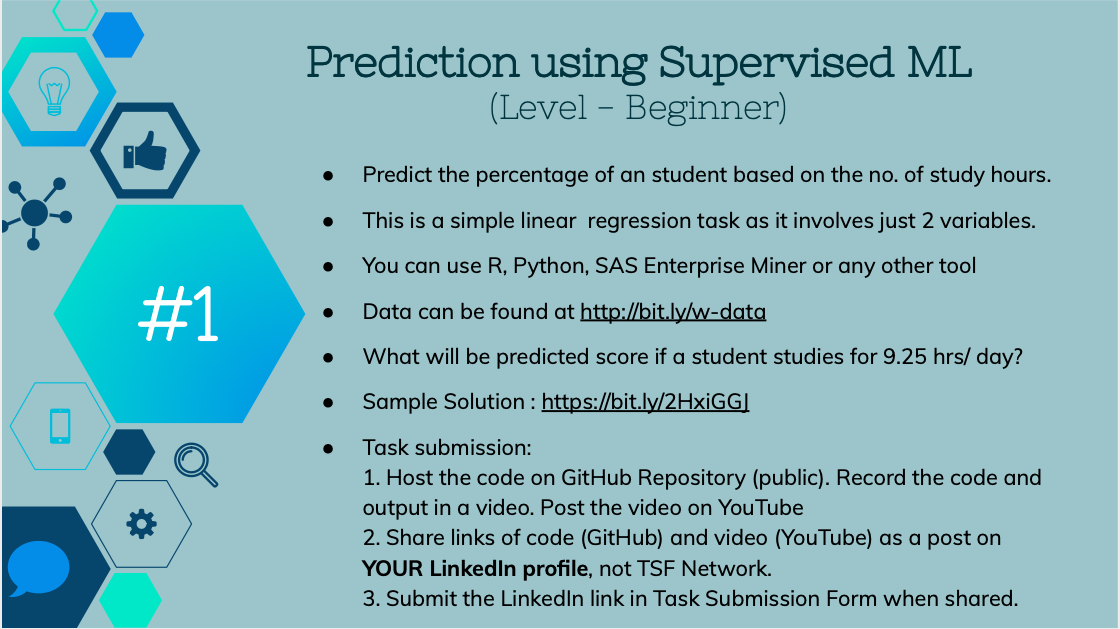

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as mt
%matplotlib inline

/Users/kshitiz/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


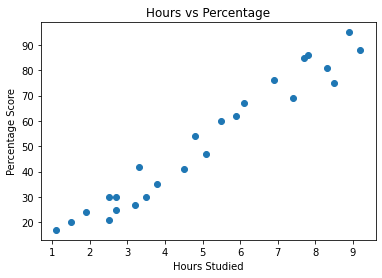

In [11]:
mt.scatter(data['Hours'],data['Scores'])
mt.title('Hours vs Percentage')  
mt.xlabel('Hours Studied')  
mt.ylabel('Percentage Score')  
mt.show()

In [70]:
X = data['Hours']
Y = data['Scores']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [72]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

LinearRegression()

In [51]:
X_train

array([[9.2],
       [5.5],
       [1.5],
       [2.7],
       [2.7],
       [5.9],
       [7.8],
       [7.4],
       [2.5],
       [8.3],
       [8.5],
       [7.7]])

In [71]:
X_train=np.array(X_train).reshape(-1,1)

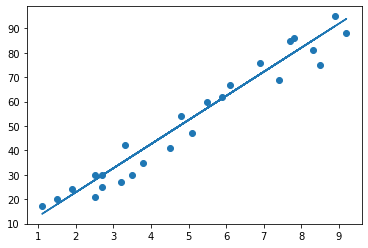

In [73]:
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
mt.scatter(X, Y)
mt.plot(X, line);
mt.show()

In [84]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(np.array(X).reshape(-1,1)) # Predicting the scores

22    3.8
21    4.8
0     2.5
3     8.5
12    4.5
Name: Hours, dtype: float64


In [86]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y, 'Predicted': y_pred})  
df['diff'] = 100*(df['Actual']-df['Predicted'])/df['Actual']

In [87]:
df

,Actual,Predicted,diff
0,21,27.763230,-32.205857
1,47,53.445106,-13.712991
2,27,34.677581,-28.435486
3,75,87.029097,-16.038796
4,30,37.640875,-25.469582
5,20,17.885586,10.572072
6,88,93.943448,-6.753918
7,60,57.396164,4.339727
8,81,85.053568,-5.004405
9,25,29.738759,-18.955036


In [88]:
# You can also test with your own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 94.43733048038092


In [89]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y, y_pred))
print('Mean Absolute Error:', metrics.r2_score(Y, y_pred)) 

Mean Absolute Error: 4.870370080163944
Mean Absolute Error: 0.9508883715106766


array([40.60416792, 50.48181243, 27.76323006, 87.0290971 , 47.51851908])

In [ ]:
0.9508883715106766